In [1]:
import json

import numpy as np

from src.main.python.Problem import Problem, create_problems_from_json
from src.main.python.constants import SYNTHESIZABLE_FROM_FIRST

with open("../../../intellij-community.json", "r", encoding="utf-8") as file:
    input_json = json.load(file)
input_json.pop()
print(len(input_json))

118133


In [3]:
problems = create_problems_from_json(input_json)
len(problems), len([p for p in problems if p.synthesizable]) / len(problems)

(556527, 0.3397822567458542)

In [8]:
dataset = [p.extract_features() for p in problems]
labels = [p.synthesizable for p in problems]
dataset = np.array(dataset)
labels = np.array(labels)
dataset.shape

(556527, 16)

<Axes: >

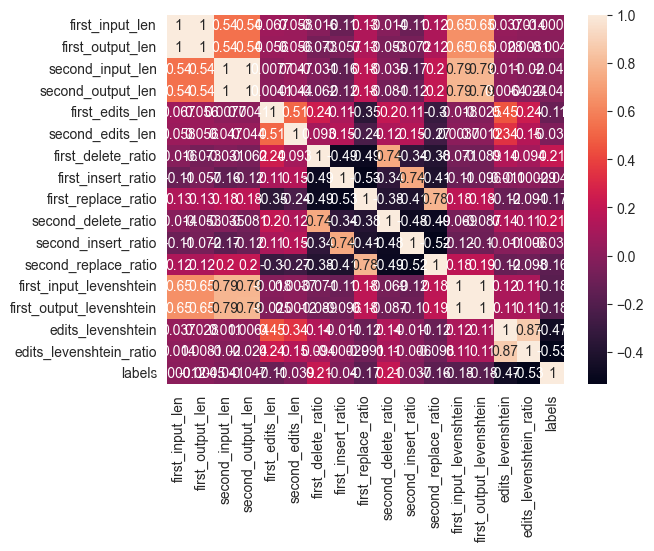

In [16]:
import pandas as pd
import seaborn as sns

pd_dataset = pd.DataFrame(dataset, columns=Problem.feature_names())
pd_dataset["labels"] = labels
correlation_matrix = pd_dataset.corr()
sns.heatmap(correlation_matrix, annot=True)

In [17]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300, n_jobs=15)
tsne_results = tsne.fit_transform(dataset)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 556527 samples in 0.018s...
[t-SNE] Computed neighbors for 556527 samples in 231.208s...
[t-SNE] Computed conditional probabilities for sample 1000 / 556527
[t-SNE] Computed conditional probabilities for sample 2000 / 556527
[t-SNE] Computed conditional probabilities for sample 3000 / 556527
[t-SNE] Computed conditional probabilities for sample 4000 / 556527
[t-SNE] Computed conditional probabilities for sample 5000 / 556527
[t-SNE] Computed conditional probabilities for sample 6000 / 556527
[t-SNE] Computed conditional probabilities for sample 7000 / 556527
[t-SNE] Computed conditional probabilities for sample 8000 / 556527
[t-SNE] Computed conditional probabilities for sample 9000 / 556527
[t-SNE] Computed conditional probabilities for sample 10000 / 556527
[t-SNE] Computed conditional probabilities for sample 11000 / 556527
[t-SNE] Computed conditional probabilities for sample 12000 / 556527
[t-SNE] Computed conditional prob

C:\Users\samuel.soukup\Documents\School\PbExtractor\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\samuel.soukup\Documents\School\PbExtractor\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\samuel.soukup\Documents\School\PbExtractor\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\samuel.soukup\Documents\School\PbExtractor\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype

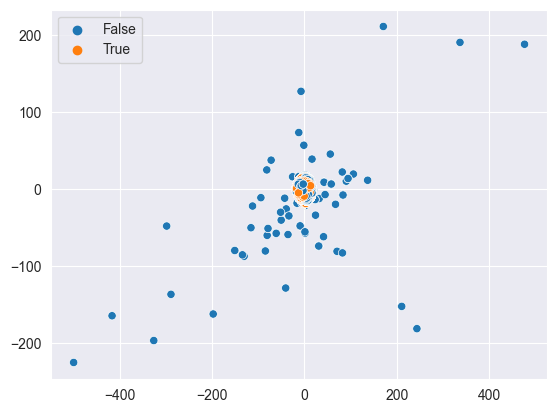

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=labels)
plt.show()

In [19]:
small_results = []
small_labels = []
for i in range(len(labels)):
    if abs(tsne_results[i, 0]) > 25 or abs(tsne_results[i, 1]) > 25:
        continue
    small_results.append(tsne_results[i])
    small_labels.append(labels[i])
small_results = np.array(small_results)
small_labels = np.array(small_labels)

C:\Users\samuel.soukup\Documents\School\PbExtractor\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\samuel.soukup\Documents\School\PbExtractor\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\samuel.soukup\Documents\School\PbExtractor\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\samuel.soukup\Documents\School\PbExtractor\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype

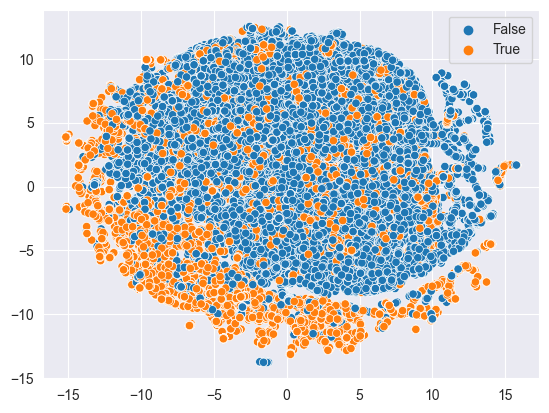

In [24]:
sns.scatterplot(x=small_results[:, 0], y=small_results[:, 1], hue=small_labels)
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X_train, X_test, y_train, y_test = train_test_split(dataset, labels, test_size=0.2, random_state=42)
rfc = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))


Accuracy: 0.8465401685443732
Precision: 0.8672882506340871
Recall: 0.6449367761130592
F1: 0.7397656809421516
